<a href="https://colab.research.google.com/github/shadow-passwd/Data_mining_project/blob/master/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_DIR = r'/content/drive/My Drive/'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
## read the csv files into pandas dataframes

reviews_df = pd.read_csv(BASE_DIR + 'reviews.csv')

In [ ]:
meta_df = pd.read_csv(BASE_DIR + 'meta.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
merged_df = pd.merge(reviews_df, meta_df, on = 'asin', how = 'left')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785863 entries, 0 to 1785862
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0_x    int64  
 1   reviewerID      object 
 2   asin            object 
 3   reviewerName    object 
 4   helpful         object 
 5   reviewText      object 
 6   overall         float64
 7   summary         object 
 8   unixReviewTime  int64  
 9   reviewTime      object 
 10  Unnamed: 0_y    float64
 11  category        object 
 12  tech1           object 
 13  description     object 
 14  fit             object 
 15  title           object 
 16  also_buy        object 
 17  image           object 
 18  tech2           object 
 19  brand           object 
 20  feature         object 
 21  rank            object 
 22  also_view       object 
 23  main_cat        object 
 24  similar_item    object 
 25  date            object 
 26  price           object 
 27  details         object 
dtypes: float64(2

In [ ]:
merged_df.isnull().sum()

Unnamed: 0_x            0
reviewerID              0
asin                    0
reviewerName        25287
helpful                 0
reviewText           1116
overall                 0
summary                15
unixReviewTime          0
reviewTime              0
Unnamed: 0_y       695122
category           695122
tech1             1518414
description        695122
fit               1785618
title              695122
also_buy           695122
image              695122
tech2             1666574
brand              696203
feature            695122
rank               695122
also_view          695122
main_cat           695529
similar_item      1027589
date               792820
price             1190577
details            695589
dtype: int64

In [ ]:

new_df= merged_df.drop(['reviewerName','tech1','fit','description','image','tech2','main_cat','date','details'],axis=1)
new_df.head(50)

,Unnamed: 0_x,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Unnamed: 0_y,category,title,also_buy,brand,feature,rank,also_view,similar_item,price
0,0,AO94DHGC771SJ,0528881469,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",40.0,"['Electronics', 'GPS, Finders & Accessories', ...",Rand McNally 528881469 7-inch Intelliroute TND...,[],Rand McNally,"['Extra large 7-inch high-definition screen', ...",['>#60 in Electronics > GPS & Navigation > Veh...,"['B00RVGXZBM', 'B00N58RZ34', 'B07FKR7VZ4', 'B0...",NaN,NaN
1,1,AMO214LNFCEI4,0528881469,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",40.0,"['Electronics', 'GPS, Finders & Accessories', ...",Rand McNally 528881469 7-inch Intelliroute TND...,[],Rand McNally,"['Extra large 7-inch high-definition screen', ...",['>#60 in Electronics > GPS & Navigation > Veh...,"['B00RVGXZBM', 'B00N58RZ34', 'B07FKR7VZ4', 'B0...",NaN,NaN
2,2,A3N7T0DY83Y4IG,0528881469,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",40.0,"['Electronics', 'GPS, Finders & Accessories', ...",Rand McNally 528881469 7-inch Intelliroute TND...,[],Rand McNally,"['Extra large 7-inch high-definition screen', ...",['>#60 in Electronics > GPS & Navigation > Veh...,"['B00RVGXZBM', 'B00N58RZ34', 'B07FKR7VZ4', 'B0...",NaN,NaN
3,3,A1H8PY3QHMQQA0,0528881469,"[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",40.0,"['Electronics', 'GPS, Finders & Accessories', ...",Rand McNally 528881469 7-inch Intelliroute TND...,[],Rand McNally,"['Extra large 7-inch high-definition screen', ...",['>#60 in Electronics > GPS & Navigation > Veh...,"['B00RVGXZBM', 'B00N58RZ34', 'B07FKR7VZ4', 'B0...",NaN,NaN
4,4,A24EV6RXELQZ63,0528881469,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",40.0,"['Electronics', 'GPS, Finders & Accessories', ...",Rand McNally 528881469 7-inch Intelliroute TND...,[],Rand McNally,"['Extra large 7-inch high-definition screen', ...",['>#60 in Electronics > GPS & Navigation > Veh...,"['B00RVGXZBM', 'B00N58RZ34', 'B07FKR7VZ4', 'B0...",NaN,NaN
5,5,A2JXAZZI9PHK9Z,0594451647,"[3, 3]",I am using this with a Nook HD+. It works as d...,5.0,HDMI Nook adapter cable,1388707200,"01 3, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46
6,6,A2P5U7BDKKT7FW,0594451647,"[0, 0]",The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,1398556800,"04 27, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46
7,7,AAZ084UMH8VZ2,0594451647,"[0, 0]",This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46
8,8,AEZ3CR6BKIROJ,0594451647,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,1405036800,"07 11, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit f

In [ ]:
new_df1=new_df.dropna(subset=['title'])
new_df1.shape
new_df1.title.unique()


array(['Rand McNally 528881469 7-inch Intelliroute TND 700 Truck GPS',
       'Barnes &amp; Noble HDTV Adapter Kit for NOOK HD and NOOK HD+',
       'VideoSecu 24" Long Arm TV Wall Mount Low Profile Articulating Full Motion Cantilever Swing Tilt wall bracket for most 22" to 55" LED LCD TV Monitor Flat Screen VESA 200x200 400x400 up to 600x400mm MAH',
       ..., 'ASUS X750 17-Inch Laptop [OLD VERSION]',
       'Kindofsmile Flash Bounce Reflector Card Diffuser for Yongnuo Yn-565 Yn-560 Yn-468 Yn460 Ii',
       'WD  2 TB WD AV-GP SATA III Intellipower 64 MB Cache Bulk/OEM AV Hard Drive WD20EURX'],
      dtype=object)

In [ ]:
new_df1.isnull().sum()

Unnamed: 0_x           0
reviewerID             0
asin                   0
helpful                0
reviewText           634
overall                0
summary                6
unixReviewTime         0
reviewTime             0
Unnamed: 0_y           0
category               0
title                  0
also_buy               0
brand               1081
feature                0
rank                   0
also_view              0
similar_item      332467
price             495455
dtype: int64

In [ ]:
#NULL brand = first name of title
new_df1.loc[new_df1.brand.isnull(),'brand'] = new_df1.title.str.split().str.get(0)
new_df1.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Unnamed: 0_x           0
reviewerID             0
asin                   0
helpful                0
reviewText           634
overall                0
summary                6
unixReviewTime         0
reviewTime             0
Unnamed: 0_y           0
category               0
title                  0
also_buy               0
brand                  0
feature                0
rank                   0
also_view              0
similar_item      332467
price             495455
dtype: int64

In [ ]:
new_df2=new_df1.dropna(subset=['similar_item','price','reviewText'])
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487972 entries, 5 to 1726355
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0_x    487972 non-null  int64  
 1   reviewerID      487972 non-null  object 
 2   asin            487972 non-null  object 
 3   helpful         487972 non-null  object 
 4   reviewText      487972 non-null  object 
 5   overall         487972 non-null  float64
 6   summary         487969 non-null  object 
 7   unixReviewTime  487972 non-null  int64  
 8   reviewTime      487972 non-null  object 
 9   Unnamed: 0_y    487972 non-null  float64
 10  category        487972 non-null  object 
 11  title           487972 non-null  object 
 12  also_buy        487972 non-null  object 
 13  brand           487972 non-null  object 
 14  feature         487972 non-null  object 
 15  rank            487972 non-null  object 
 16  also_view       487972 non-null  object 
 17  similar_i

In [ ]:
#new_df2.to_csv('/content/drive/My Drive/nullremoved_df1.csv', sep=',', encoding='utf-8', index = False)

In [ ]:
#new_df2 = pd.read_csv('/content/drive/My Drive/nullremoved_df1.csv')


In [ ]:
new_df2['review_text'] = new_df2[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
new_df2 = new_df2.drop(['reviewText', 'summary'], axis = 1)
new_df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0_x,reviewerID,asin,helpful,overall,unixReviewTime,reviewTime,Unnamed: 0_y,category,title,also_buy,brand,feature,rank,also_view,similar_item,price,review_text
5,5,A2JXAZZI9PHK9Z,0594451647,"[3, 3]",5.0,1388707200,"01 3, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,HDMI Nook adapter cable I am using this with a...
6,6,A2P5U7BDKKT7FW,0594451647,"[0, 0]",2.0,1398556800,"04 27, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,Cheap proprietary scam The cable is very wobbl...
7,7,AAZ084UMH8VZ2,0594451647,"[0, 0]",5.0,1399161600,"05 4, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A Perfdect Nook HD+ hook up This adaptor is re...
8,8,AEZ3CR6BKIROJ,0594451647,"[0, 0]",4.0,1405036800,"07 11, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A nice easy to use accessory. This adapter eas...
9,9,A3BY5KCNQZXV5U,0594451647,"[3, 3]",5.0,1390176000,"01 20, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,This works great but read the details... This ...


In [ ]:
##########################################
## Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end
##########################################


list_positive = []
list_negative = []

for help in new_df2['helpful']:
    s= help
    s=s[1:]
    s=s[:len(s)-2]
    #print(s)
    x=s.split(',')
    h0=int(x[0])
    if(x[1]==' '):
        h1=h0
    else:
        h1=int(x[1])

    list_positive.append(h0)

    list_negative.append(h1-h0)
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
new_df2['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
new_df2['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
new_df2 = new_df2.drop('helpful', axis = 1)
new_df2.head()

,Unnamed: 0_x,reviewerID,asin,overall,unixReviewTime,reviewTime,Unnamed: 0_y,category,title,also_buy,brand,feature,rank,also_view,similar_item,price,review_text,pos_feedback,neg_feedback
5,5,A2JXAZZI9PHK9Z,0594451647,5.0,1388707200,"01 3, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,HDMI Nook adapter cable I am using this with a...,3,0
6,6,A2P5U7BDKKT7FW,0594451647,2.0,1398556800,"04 27, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,Cheap proprietary scam The cable is very wobbl...,0,0
7,7,AAZ084UMH8VZ2,0594451647,5.0,1399161600,"05 4, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A Perfdect Nook HD+ hook up This adaptor is re...,0,0
8,8,AEZ3CR6BKIROJ,0594451647,4.0,1405036800,"07 11, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A nice easy to use accessory. This adapter eas...,0,0
9,9,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,"01 20, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,This works great but read the details... This ...,3,0


In [ ]:
new_df2['rating_class'] = new_df2['overall'].apply(lambda x: 'bad' if x < 3 else'good')
new_df2.head()

,Unnamed: 0_x,reviewerID,asin,overall,unixReviewTime,reviewTime,Unnamed: 0_y,category,title,also_buy,brand,feature,rank,also_view,similar_item,price,review_text,pos_feedback,neg_feedback,rating_class
5,5,A2JXAZZI9PHK9Z,0594451647,5.0,1388707200,"01 3, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,HDMI Nook adapter cable I am using this with a...,3,0,good
6,6,A2P5U7BDKKT7FW,0594451647,2.0,1398556800,"04 27, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,Cheap proprietary scam The cable is very wobbl...,0,0,bad
7,7,AAZ084UMH8VZ2,0594451647,5.0,1399161600,"05 4, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A Perfdect Nook HD+ hook up This adaptor is re...,0,0,good
8,8,AEZ3CR6BKIROJ,0594451647,4.0,1405036800,"07 11, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A nice easy to use accessory. This adapter eas...,0,0,good
9,9,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,"01 20, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,This works great but read the details... This ...,3,0,good


In [ ]:
new_df2['help_prop'] = new_df2.pos_feedback.div((new_df2.pos_feedback+ new_df2.neg_feedback), axis=0)
new_df2.head()

,Unnamed: 0_x,reviewerID,asin,overall,unixReviewTime,reviewTime,Unnamed: 0_y,category,title,also_buy,brand,feature,rank,also_view,similar_item,price,review_text,pos_feedback,neg_feedback,rating_class,help_prop
5,5,A2JXAZZI9PHK9Z,0594451647,5.0,1388707200,"01 3, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,HDMI Nook adapter cable I am using this with a...,3,0,good,1.0
6,6,A2P5U7BDKKT7FW,0594451647,2.0,1398556800,"04 27, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,Cheap proprietary scam The cable is very wobbl...,0,0,bad,NaN
7,7,AAZ084UMH8VZ2,0594451647,5.0,1399161600,"05 4, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A Perfdect Nook HD+ hook up This adaptor is re...,0,0,good,NaN
8,8,AEZ3CR6BKIROJ,0594451647,4.0,1405036800,"07 11, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A nice easy to use accessory. This adapter eas...,0,0,good,NaN
9,9,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,"01 20, 2014",84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,This works great but read the details... This ...,3,0,good,1.0


In [ ]:
product_reviews_hp4= new_df2
product_reviews_hp4['help_prop'].fillna(0, inplace=True)

In [ ]:
##########################################
# Convert time object to datetime and create a new column named 'time'
##########################################
product_reviews_hp4['time'] = product_reviews_hp4.reviewTime.str.replace(',', "")
product_reviews_hp4['time'] = pd.to_datetime(product_reviews_hp4['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
product_reviews_hp4 = product_reviews_hp4.drop('reviewTime', axis = 1)

product_reviews_hp4.head()

,Unnamed: 0_x,reviewerID,asin,overall,unixReviewTime,Unnamed: 0_y,category,title,also_buy,brand,feature,rank,also_view,similar_item,price,review_text,pos_feedback,neg_feedback,rating_class,help_prop,time
5,5,A2JXAZZI9PHK9Z,0594451647,5.0,1388707200,84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,HDMI Nook adapter cable I am using this with a...,3,0,good,1.0,2014-01-03
6,6,A2P5U7BDKKT7FW,0594451647,2.0,1398556800,84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,Cheap proprietary scam The cable is very wobbl...,0,0,bad,0.0,2014-04-27
7,7,AAZ084UMH8VZ2,0594451647,5.0,1399161600,84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A Perfdect Nook HD+ hook up This adaptor is re...,0,0,good,0.0,2014-05-04
8,8,AEZ3CR6BKIROJ,0594451647,4.0,1405036800,84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A nice easy to use accessory. This adapter eas...,0,0,good,0.0,2014-07-11
9,9,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,84.0,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,This works great but read the details... This ...,3,0,good,1.0,2014-01-20


In [ ]:
product_reviews_hp4 =product_reviews_hp4.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1)
product_reviews_hp4.info()
product_reviews_hp4.columns = ['reviewer_id','product_id','rating','unix_review_time','categories','product_title','also_buy','brand_name','feature','rank','related','similar_item','price','review_text','pos_feedback', 'neg_feedback', 'rating_class', 'help_prop','review_time']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487972 entries, 5 to 1726355
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      487972 non-null  object        
 1   asin            487972 non-null  object        
 2   overall         487972 non-null  float64       
 3   unixReviewTime  487972 non-null  int64         
 4   category        487972 non-null  object        
 5   title           487972 non-null  object        
 6   also_buy        487972 non-null  object        
 7   brand           487972 non-null  object        
 8   feature         487972 non-null  object        
 9   rank            487972 non-null  object        
 10  also_view       487972 non-null  object        
 11  similar_item    487972 non-null  object        
 12  price           487972 non-null  object        
 13  review_text     487972 non-null  object        
 14  pos_feedback    487972 non-null  in

In [ ]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(product_reviews_hp4)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(product_reviews_hp4.reviewer_id.unique()))
reviewer_prop = float(len(product_reviews_hp4.reviewer_id.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(product_reviews_hp4.product_id.unique()))
product_prop = float(len(product_reviews_hp4.product_id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_reviews_hp4.rating.mean(),3))

### Average helpful ratio
print ("Average helpfull ratio score: ",round(product_reviews_hp4.help_prop.mean(),3))


print ("================================================")

Number of reviews:  487972

Number of unique reviewers:  164545
Prop of unique reviewers:  0.337

Number of unique products:  11672
Prop of unique products:  0.024

Average rating score:  4.298
Average helpfull ratio score:  0.877


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Number of Reviews')

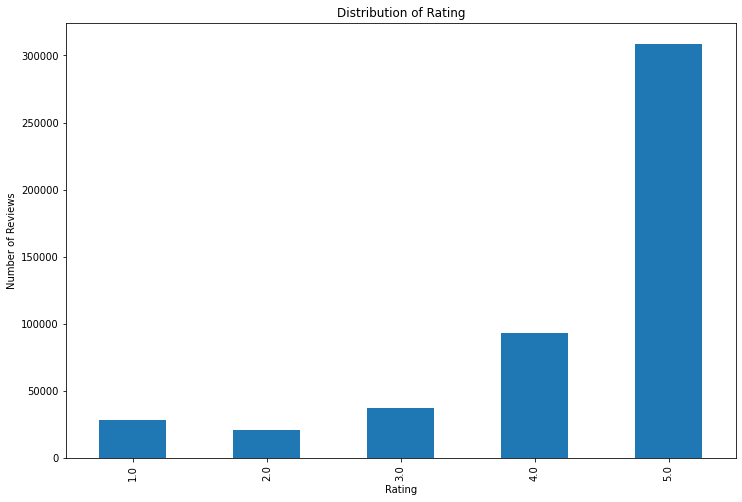

In [ ]:
##########################################
## PLOT DISTRIBUTION OF RATING 
##########################################
# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_reviews_hp4['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

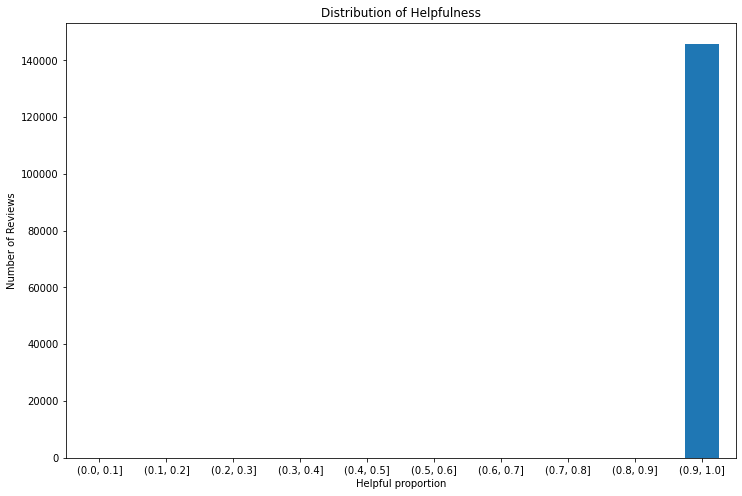

In [ ]:
##########################################
## DISTRIBUTION OF HELPFULNESS
########################################## 

plt.figure(figsize=(12,8))

cutoff = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


Dist_help = product_reviews_hp4.groupby([pd.cut(product_reviews_hp4['help_prop'], bins = cutoff)]).size()
Dist_help.plot(kind='bar')

plt.title("Distribution of Helpfulness")
plt.xlabel("Helpful proportion")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [ ]:
##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 

class_counts = product_reviews_hp4.groupby('rating').size()
class_counts

rating
1.0     28302
2.0     20859
3.0     36858
4.0     93260
5.0    308693
dtype: int64

In [ ]:
##########################################
# Customer totals for each rating class
##########################################
product_reviews_hp4['rating_class'].value_counts()

good    438811
bad      49161
Name: rating_class, dtype: int64

In [ ]:
##########################################
# Print the number of positive feedback
##########################################
pos = len(product_reviews_hp4[product_reviews_hp4['pos_feedback'] > 0])
print('Number of positive feedbacks: {}'.format(pos))

##########################################
# Print the number of negative feedback
##########################################
neg = len(product_reviews_hp4[product_reviews_hp4['neg_feedback'] > 0])      
print('\nNumber of negative feedbacks: {}'.format(neg))

Number of positive feedbacks: 173950

Number of negative feedbacks: 543


In [ ]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(product_reviews_hp4['reviewer_id'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(product_reviews_hp4['product_id'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['reviewer_id'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['product_id'].unique()))))


Number of unique customers : 164545

Number of unique products : 11672

Review per customer: 2.9655838828284056

Review per product: 41.80705962988348


 ***TEXT PREPROCESSING***

In [ ]:
pip install contractions

     |████████████████████████████████| 245kB 3.7MB/s 
     |████████████████████████████████| 317kB 7.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81705 sha256=d08b1fdf422f13359d34d58c299fbabb9d45839a3b07ecc32988b0619d8a8a0f
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
import contractions
from contractions import contractions_dict
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (product_reviews_hp4["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 59638837


In [ ]:
import re, string, unicodedata
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from contractions import contractions_dict

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text






# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.remove('headphone')
#stopword_list.remove('headphones')
#stopword_list.remove('earbuds')
#stopword_list.remove('bud')
#stopword_list.remove('ear')
#stopword_list.remove('sony')
#stopword_list.remove('product')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [ ]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [ ]:
product_reviews_hp4['clean_text'] = product_reviews_hp4['review_text'].map(lambda text: normalize_and_lemmaize(text))

In [ ]:
product_reviews_hp4

,reviewer_id,product_id,rating,unix_review_time,categories,product_title,also_buy,brand_name,feature,rank,related,similar_item,price,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
5,A2JXAZZI9PHK9Z,0594451647,5.0,1388707200,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,HDMI Nook adapter cable I am using this with a...,3,0,good,1.0,2014-01-03,hdmi nook adapter cable use nook hd work descr...
6,A2P5U7BDKKT7FW,0594451647,2.0,1398556800,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,Cheap proprietary scam The cable is very wobbl...,0,0,bad,0.0,2014-04-27,cheap proprietary scam cable wobbly sometimes ...
7,AAZ084UMH8VZ2,0594451647,5.0,1399161600,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A Perfdect Nook HD+ hook up This adaptor is re...,0,0,good,0.0,2014-05-04,perfdect nook hd hook adaptor real easy setup ...
8,AEZ3CR6BKIROJ,0594451647,4.0,1405036800,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A nice easy to use accessory. This adapter eas...,0,0,good,0.0,2014-07-11,nice easy use accessory adapter easily connect...
9,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,This works great but read the details... This ...,3,0,good,1.0,2014-01-20,work great read detail product really work gre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726351,AAAY3J29T2BBE,B00DX76BPU,5.0,1404777600,"['Electronics', 'Computers & Accessories', 'La...",Pwr UL Listed 19.5V 3.33A AC Adapter Power Cha...,[],PWR+,['FEATURES / POWER SPECS : Only Pwr+ Chargers ...,"['>#32,037 in Electronics (See Top 100 in Elec...","['B0744H1XZ3', 'B01I34G3UA', 'B007WWORIU', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$17.99,Five Stars Works as advertised. What more can ...,0,0,good,0.0,2014-07-08,five star work advertise say
1726352,A3PR7U6N2KU31W,B00DX76BPU,1.0,1395705600,"['Electronics', 'Computers & Accessories', 'La...",Pwr UL Listed 19.5V 3.33A AC Adapter Power Cha...,[],PWR+,['FEATURES / POWER SPECS : Only Pwr+ Chargers ...,"['>#32,037 in Electronics (See Top 100 in Elec...","['B0744H1XZ3', 'B01I34G3UA', 'B007WWORIU', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$17.99,Did not fit my HP Chromebook 14 All the review...,0,0,bad,0.0,2014-03-25,not fit hp chromebook review say tight fit no ...
1726353,A2GZ0HW54F96DQ,B00DX76BPU,5.0,1388275200,"['Electronics', 'Computers & Accessories', 'La...",Pwr UL Listed 19.5V 3.33A AC Adapter Power Cha...,[],PWR+,['FEATURES / POWER SPECS : Only Pwr+ Chargers ...,"['>#32,037 in E

In [ ]:
product_reviews_hp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487972 entries, 5 to 1726355
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   reviewer_id       487972 non-null  object        
 1   product_id        487972 non-null  object        
 2   rating            487972 non-null  float64       
 3   unix_review_time  487972 non-null  int64         
 4   categories        487972 non-null  object        
 5   product_title     487972 non-null  object        
 6   also_buy          487972 non-null  object        
 7   brand_name        487972 non-null  object        
 8   feature           487972 non-null  object        
 9   rank              487972 non-null  object        
 10  related           487972 non-null  object        
 11  similar_item      487972 non-null  object        
 12  price             487972 non-null  object        
 13  review_text       487972 non-null  object        
 14  pos

In [ ]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (product_reviews_hp4["clean_text"].apply(word_tokenize)) for w in t])
#clean_tokens=len((product_reviews_hp4["clean_text"]))
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 27293858

Percentage of removed tokens: 0.54


In [ ]:
product_reviews_hp4

,reviewer_id,product_id,rating,unix_review_time,categories,product_title,also_buy,brand_name,feature,rank,related,similar_item,price,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
5,A2JXAZZI9PHK9Z,0594451647,5.0,1388707200,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,HDMI Nook adapter cable I am using this with a...,3,0,good,1.0,2014-01-03,hdmi nook adapter cable use nook hd work descr...
6,A2P5U7BDKKT7FW,0594451647,2.0,1398556800,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,Cheap proprietary scam The cable is very wobbl...,0,0,bad,0.0,2014-04-27,cheap proprietary scam cable wobbly sometimes ...
7,AAZ084UMH8VZ2,0594451647,5.0,1399161600,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A Perfdect Nook HD+ hook up This adaptor is re...,0,0,good,0.0,2014-05-04,perfdect nook hd hook adaptor real easy setup ...
8,AEZ3CR6BKIROJ,0594451647,4.0,1405036800,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,A nice easy to use accessory. This adapter eas...,0,0,good,0.0,2014-07-11,nice easy use accessory adapter easily connect...
9,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,"['Electronics', 'Computers &amp; Accessories',...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,[],Barnes &amp; Noble,['Connects NOOK to your high-definition televi...,"['>#1,708 in Computers &amp; Accessories &gt; ...","['B00RRFMVEE', 'B01N5F6RNV', '1400699169', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$1.46,This works great but read the details... This ...,3,0,good,1.0,2014-01-20,work great read detail product really work gre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726351,AAAY3J29T2BBE,B00DX76BPU,5.0,1404777600,"['Electronics', 'Computers & Accessories', 'La...",Pwr UL Listed 19.5V 3.33A AC Adapter Power Cha...,[],PWR+,['FEATURES / POWER SPECS : Only Pwr+ Chargers ...,"['>#32,037 in Electronics (See Top 100 in Elec...","['B0744H1XZ3', 'B01I34G3UA', 'B007WWORIU', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$17.99,Five Stars Works as advertised. What more can ...,0,0,good,0.0,2014-07-08,five star work advertise say
1726352,A3PR7U6N2KU31W,B00DX76BPU,1.0,1395705600,"['Electronics', 'Computers & Accessories', 'La...",Pwr UL Listed 19.5V 3.33A AC Adapter Power Cha...,[],PWR+,['FEATURES / POWER SPECS : Only Pwr+ Chargers ...,"['>#32,037 in Electronics (See Top 100 in Elec...","['B0744H1XZ3', 'B01I34G3UA', 'B007WWORIU', 'B0...","class=""a-bordered a-horizontal-stripes a-spa...",$17.99,Did not fit my HP Chromebook 14 All the review...,0,0,bad,0.0,2014-03-25,not fit hp chromebook review say tight fit no ...
1726353,A2GZ0HW54F96DQ,B00DX76BPU,5.0,1388275200,"['Electronics', 'Computers & Accessories', 'La...",Pwr UL Listed 19.5V 3.33A AC Adapter Power Cha...,[],PWR+,['FEATURES / POWER SPECS : Only Pwr+ Chargers ...,"['>#32,037 in E

In [ ]:
product_reviews_hp4.to_csv('/content/drive/My Drive/clean_review.csv', sep=',', encoding='utf-8', index = False)
